Importing Data

In [11]:
# import necessary libraries
import numpy as np                 # manipulating arrays
import scipy.stats                 # mathematical algorithms
import csv                         # opening csvs
import pandas as pd                # manipulating tabular data
import matplotlib.pyplot as plt    # regression plot
import math
import seaborn as sns

In [12]:
Titanic_data_list = pd.read_csv("./data/train.csv")
print(Titanic_data_list.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


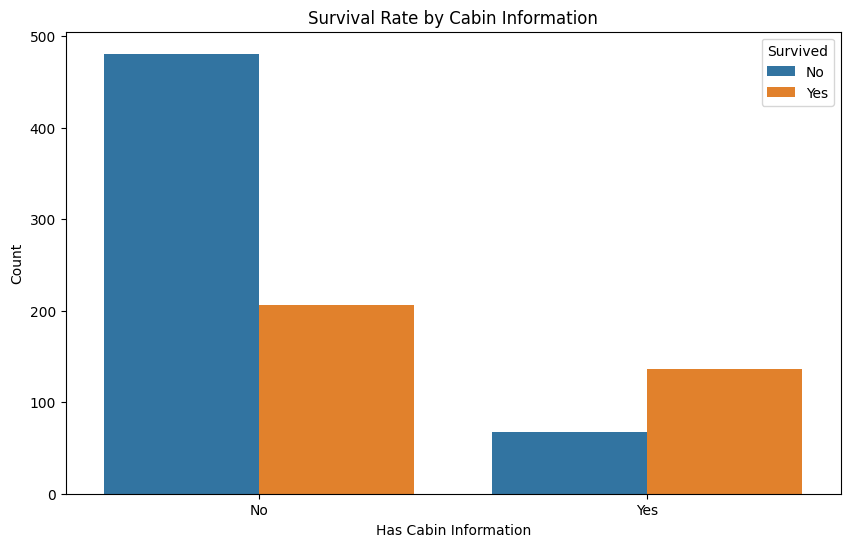

In [13]:
# Categorize passengers into those with and without cabin information
Titanic_data_list['Has_Cabin'] = Titanic_data_list['Cabin'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Has_Cabin', hue='Survived', data=Titanic_data_list)

plt.title('Survival Rate by Cabin Information')
plt.xlabel('Has Cabin Information')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


the survival rates for passengers based on whether or not they had cabin information available.

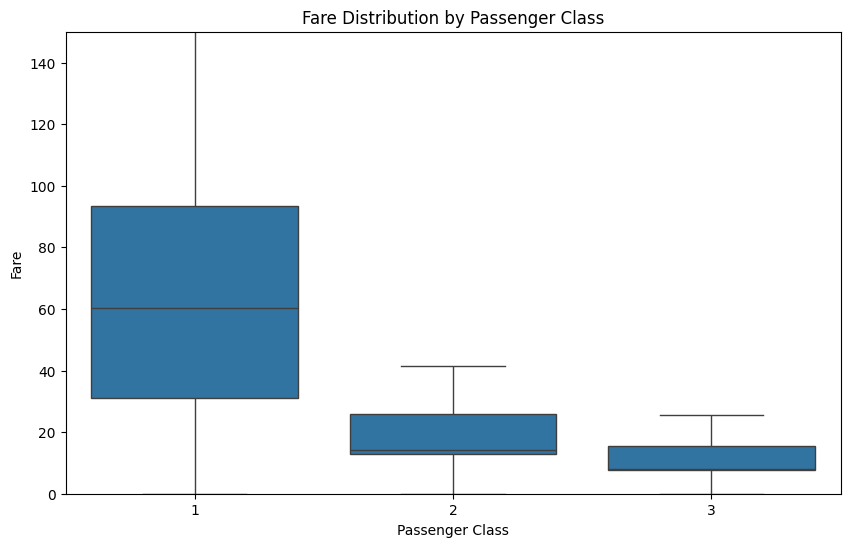

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=Titanic_data_list, showfliers=False)

plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, 150)  # Adjusting the y-axis limit to focus on the majority of data points
plt.show()


This box plot will show the distribution of fare prices within each passenger class, excluding outliers to focus on the core distribution. It can reveal the economic disparities between classes and how they correlate with the fare structure on the Titanic.

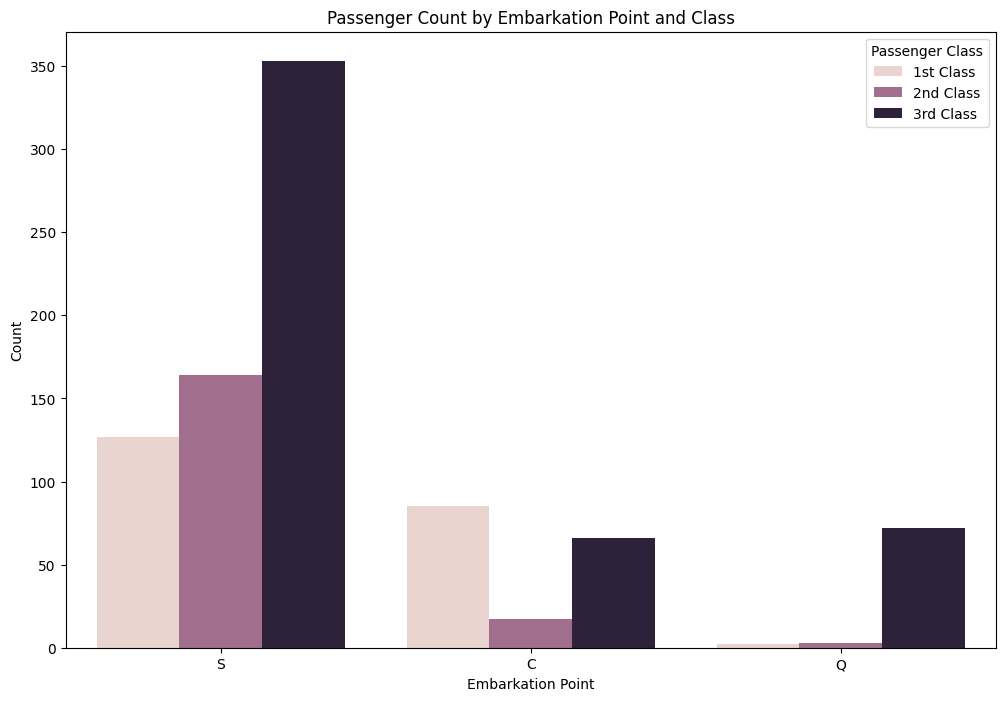

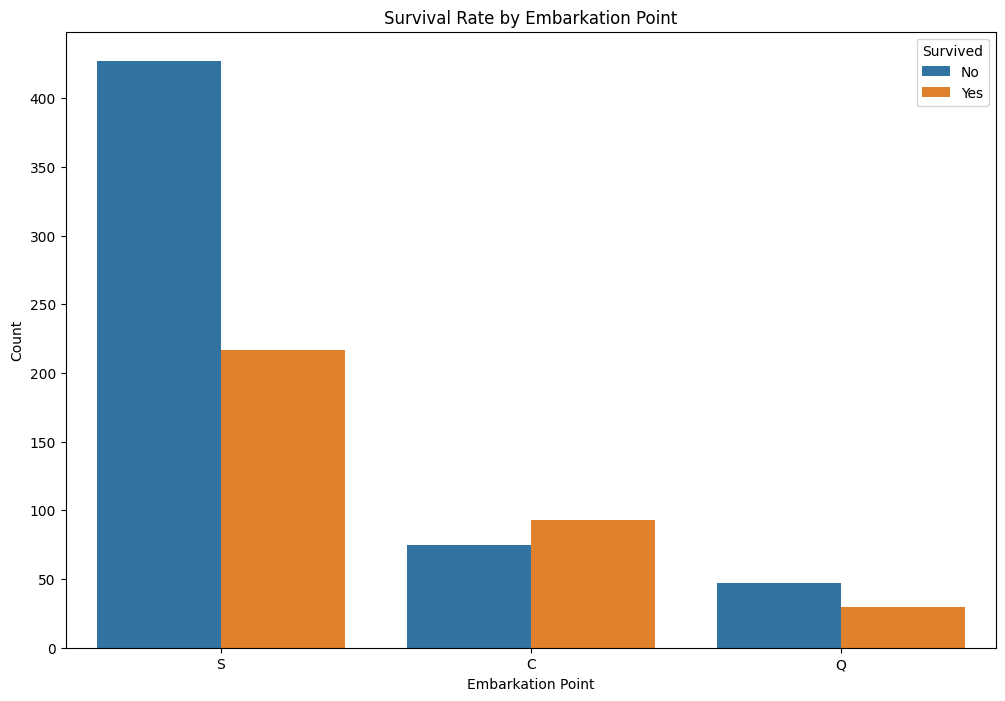

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Embarked', hue='Pclass', data=Titanic_data_list)

plt.title('Passenger Count by Embarkation Point and Class')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Passenger Class', loc='upper right', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Embarked', hue='Survived', data=Titanic_data_list)

plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


the relationship between the embarkation point, class, and survival. This plot will give us insights into any patterns that might exist between where passengers embarked, their class, and their survival outcomes.

C:\Users\31400\AppData\Local\Temp\ipykernel_2988\114277437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_data_age_filtered['Age_Z_Score'] = zscore(Titanic_data_age_filtered['Age'])


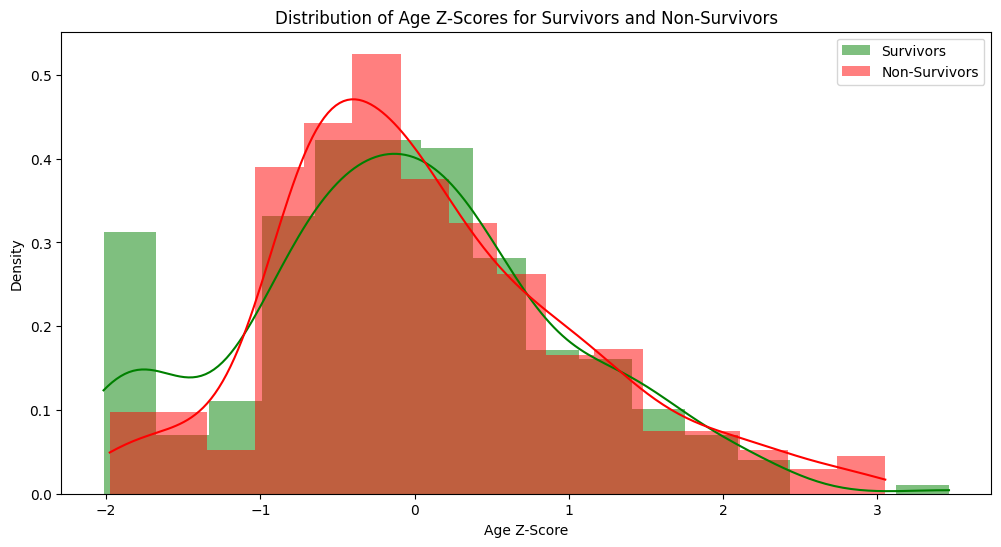

In [16]:
from scipy.stats import zscore

# Filter out passengers with missing age
Titanic_data_age_filtered = Titanic_data_list.dropna(subset=['Age'])

# Calculate z-scores for ages
Titanic_data_age_filtered['Age_Z_Score'] = zscore(Titanic_data_age_filtered['Age'])

# Separate survivors and non-survivors
survivors = Titanic_data_age_filtered[Titanic_data_age_filtered['Survived'] == 1]
non_survivors = Titanic_data_age_filtered[Titanic_data_age_filtered['Survived'] == 0]

# Plot histograms
plt.figure(figsize=(12, 6))

sns.histplot(survivors['Age_Z_Score'], color="green", kde=True, label='Survivors', stat="density", linewidth=0)
sns.histplot(non_survivors['Age_Z_Score'], color="red", kde=True, label='Non-Survivors', stat="density", linewidth=0)

plt.title('Distribution of Age Z-Scores for Survivors and Non-Survivors')
plt.xlabel('Age Z-Score')
plt.ylabel('Density')
plt.legend()
plt.show()


To delve deeper into survival analysis and introduce a statistical perspective, let's consider a z-score plot for the age of passengers. Z-scores measure the distance of a data point from the mean in terms of standard deviations. This can be particularly useful for understanding how the age of survivors and non-survivors compares to the overall passenger age distribution.

We'll calculate the z-scores for the ages of passengers and then create two histograms: one for survivors and another for non-survivors, to see how their ages deviate from the mean passenger age. This analysis will be based on passengers with recorded ages, omitting missing values.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


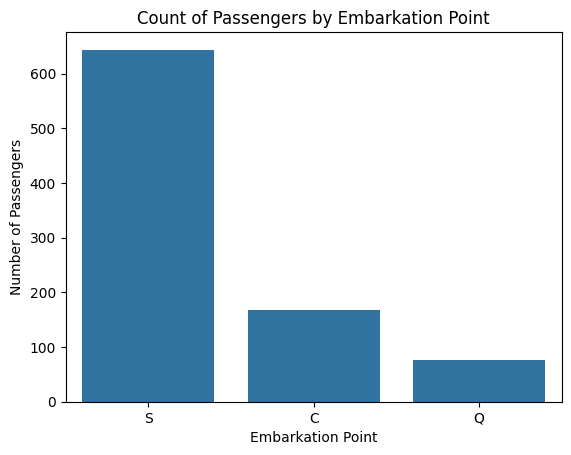

In [17]:
#Most used port
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_data = pd.read_csv('data/train.csv')

# Count the occurrences of each category in the 'Embarked' column
embarked_counts = train_data['Embarked'].value_counts()

# Print the counts
print(embarked_counts)

# Visualize the counts
sns.barplot(x=embarked_counts.index, y=embarked_counts.values)
plt.title('Count of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.show()


In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Load datasets
train_data = pd.read_csv('data/train.csv')

#preproccessing 
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)#filling S because S is the majority, it has least amout of impact on our accuracy

# Convert categorical variables to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'])   #created three columns C Q S
#alternative, using convert them into numerical values
#train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Assuming 'train_data' is loaded and prepared
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']
X = train_data[features]
y = train_data['Survived']

# Split the data into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model on the new training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Validate the model on the new validation set
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Validation Accuracy: {accuracy}")



C:\Users\31400\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.8100558659217877


In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Load datasets
train_data = pd.read_csv('data/train.csv')

#preproccessing 
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)#filling S because S is the majority, it has least amout of impact on our accuracy

# Convert categorical variables to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
#train_data = pd.get_dummies(train_data, columns=['Embarked'])   #created three columns C Q S
#alternative, using convert them into numerical values
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Assuming 'train_data' is loaded and prepared
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

# Split the data into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Train your model on the new training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Validate the model on the new validation set
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.8444444444444444


In [20]:
#Cross Validation
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load datasets
train_data = pd.read_csv('data/train.csv')

# Preprocessing
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)  # filling S because it is the majority

# Convert categorical variables to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'])

# Features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

# Initialize your model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Output the mean accuracy of cross-validation
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy Scores: [0.77653631 0.78651685 0.78089888 0.76966292 0.82022472]
Mean CV Accuracy: 0.7867679367271359


C:\Users\31400\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\31400\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Validate the model on the new validation set
tree_predictions = tree_model.predict(X_val)
tree_accuracy = accuracy_score(y_val, tree_predictions)
print(f"Decision Tree Validation Accuracy Sk-learn: {tree_accuracy}")


Decision Tree Validation Accuracy Sk-learn: 0.7666666666666667


In [22]:
from sklearn.ensemble import RandomForestClassifier

# using Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Validate the model on the new validation set
forest_predictions = forest_model.predict(X_val)
forest_accuracy = accuracy_score(y_val, forest_predictions)
print(f"Random Forest Validation Accuracy: {forest_accuracy}")


Random Forest Validation Accuracy: 0.8222222222222222


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

# using Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predicting with the linear regression model
lin_predictions = lin_model.predict(X_val)

# Thresholding the predictions to get binary outcome
lin_predictions_binary = np.where(lin_predictions > 0.5, 1, 0)

# Validate the model on the new validation set
lin_accuracy = accuracy_score(y_val, lin_predictions_binary)
print(f"Linear Regression (as classifier) Validation Accuracy: {lin_accuracy}")


Linear Regression (as classifier) Validation Accuracy: 0.8222222222222222


In [24]:
#implement dicision tree
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Load datasets
train_data = pd.read_csv('data/train.csv')

#preproccessing 
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)#filling S because S is the majority, it has least amout of impact on our accuracy

# Convert categorical variables to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'])   #created three columns C Q S
#alternative, using convert them into numerical values
#train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Assuming 'train_data' is loaded and prepared
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']
X = train_data[features]
y = train_data['Survived']

# Split the data into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

def calculate_entropy(y):
    proportions = np.bincount(y) / len(y)
    return -np.sum([p * np.log2(p) for p in proportions if p > 0])

def best_split(X, y, num_features):
    best_gain = -1
    split_idx, split_threshold = None, None
    for feature_idx in range(num_features):
        thresholds, classes = zip(*sorted(zip(X[:, feature_idx], y)))
        unique_thresholds = np.unique(thresholds)  # Ensure unique thresholds for comparison
        for i in range(1, len(unique_thresholds)):
            threshold = (unique_thresholds[i] + unique_thresholds[i - 1]) / 2
            lhs = y[X[:, feature_idx] <= threshold]
            rhs = y[X[:, feature_idx] > threshold]
            gain = information_gain(y, lhs, rhs)
            if gain > best_gain:
                best_gain = gain
                split_idx = feature_idx
                split_threshold = threshold
    return split_idx, split_threshold

def information_gain(y, lhs, rhs):
    parent_entropy = calculate_entropy(y)
    n = len(y)
    l, r = len(lhs), len(rhs)
    if l == 0 or r == 0:
        return 0
    child_entropy = (l / n) * calculate_entropy(lhs) + (r / n) * calculate_entropy(rhs)
    return parent_entropy - child_entropy

def build_tree(X, y, depth=0, max_depth=10):
    num_samples, num_features = X.shape
    num_labels = len(np.unique(y))
    if depth >= max_depth or num_labels == 1:
        leaf_value = Counter(y).most_common(1)[0][0]
        return Node(value=leaf_value)
    split_idx, threshold = best_split(X, y, num_features)
    if split_idx is None:
        return Node(value=Counter(y).most_common(1)[0][0])
    left_idxs = X[:, split_idx] <= threshold
    right_idxs = X[:, split_idx] > threshold
    left = build_tree(X[left_idxs], y[left_idxs], depth + 1, max_depth)
    right = build_tree(X[right_idxs], y[right_idxs], depth + 1, max_depth)
    return Node(split_idx, threshold, left, right)

def predict(node, x):
    while not node.is_leaf_node():
        if x[node.feature] <= node.threshold:
            node = node.left
        else:
            node = node.right
    return node.value

def decision_tree_predictions(X, tree):
    return np.array([predict(tree, xi) for xi in X])

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_val_np = X_val.to_numpy()

# Build the tree
tree = build_tree(X_train_np, y_train_np, max_depth=3)

# Make predictions
predictions = decision_tree_predictions(X_val_np, tree)
accuracy = accuracy_score(y_val, predictions)
print(f"decision tree implementation Accuracy: {accuracy}")


decision tree implementation Accuracy: 0.8222222222222222


In [26]:
#decision tree with pruning 
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None, samples=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.samples = samples  # Number of samples at this node

    def is_leaf_node(self):
        return self.value is not None

def build_tree(X, y, depth=0, max_depth=10):
    num_samples, num_features = X.shape
    num_labels = len(np.unique(y))
    if depth >= max_depth or num_labels == 1 or num_samples < 2:
        leaf_value = Counter(y).most_common(1)[0][0]
        return Node(value=leaf_value, samples=num_samples)
    split_idx, threshold = best_split(X, y, num_features)
    if split_idx is None:
        return Node(value=Counter(y).most_common(1)[0][0], samples=num_samples)
    left_idxs = X[:, split_idx] <= threshold
    right_idxs = X[:, split_idx] > threshold
    left = build_tree(X[left_idxs], y[left_idxs], depth + 1, max_depth)
    right = build_tree(X[right_idxs], y[right_idxs], depth + 1, max_depth)
    return Node(split_idx, threshold, left, right, samples=num_samples)
def prune_tree(node, X_val, y_val):
    if node.is_leaf_node():
        return
    if node.left:
        prune_tree(node.left, X_val, y_val)
    if node.right:
        prune_tree(node.right, X_val, y_val)
    
    # Check if converting this node to a leaf improves validation accuracy
    if not node.left.is_leaf_node() or not node.right.is_leaf_node():
        return  # Only prune if both children are leaves
    
    # Calculate accuracy without pruning
    predictions = decision_tree_predictions(X_val, tree)
    accuracy_before = accuracy_score(y_val, predictions)
    
    # Convert to leaf node
    original_left, original_right = node.left, node.right
    node.left = node.right = None
    node.value = Counter(y[node.samples]).most_common(1)[0][0]
    
    # Calculate accuracy after pruning
    predictions = decision_tree_predictions(X_val, tree)
    accuracy_after = accuracy_score(y_val, predictions)
    
    # Revert changes if accuracy decreased
    if accuracy_after < accuracy_before:
        node.left, node.right = original_left, original_right
        node.value = None
    

tree = build_tree(X_train_np, y_train_np, max_depth=10)
prune_tree(tree, X_val_np, y_val_np)


NameError: name 'y_val_np' is not defined